# [IAPR 2019:][iapr2019] Lab 2 ‒  Object description

**Author:** Asli YORUSUN, Yamin SEPEHRI 

**Due date:** 19.04.2019

[iapr2019]: https://github.com/LTS5/iapr-2019

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Description
In the `lab-02-data/` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

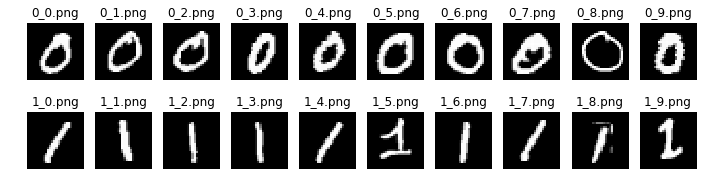

In [2]:
import os
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors

Let ($x_{k}$,$y_{k}$), _k=0…N-1_, be the coordinates of the
N successive points of a contour. For each of
those points, we define them as complex
numbers: $u_{k}$ = $x_{k}$ + j$y_{k}$.

We will write the x and y coordinates as two vectors, and use each coordinate pairs as a complex number, x-axis treated as real axis and y as imaginary axis. Fourier transforming the new coordinates generates the fourier descriptors.

Inverse transforming of all these descriptors regenerates the  original coordinates. If only some of the descriptors are used in the inverse transform, an approximation of the original object is the result.


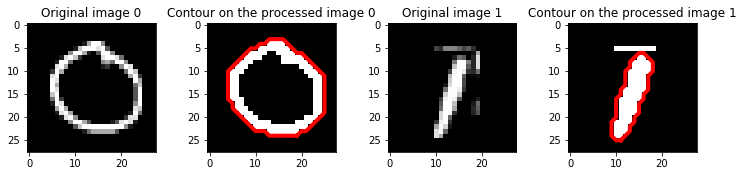

In [3]:
# Contour detection 
import cv2
from skimage import measure, transform, morphology
import numpy as np
from scipy import ndimage
from skimage import morphology

# Process the boundary on the given image
image0 = np.copy(zeros_im[-2])
image1 = np.copy(ones_im[-2])

# Define a function to perform mathematical morphology & binarization operations
kernel2 = np.ones((2,2),np.uint8)
def pre_processing(image):
    image = ndimage.grey_opening(image,size = (1,2))
    _, thresh = cv2.threshold(image,40,255,cv2.THRESH_BINARY)
    removed_small_objects = morphology.remove_small_objects(thresh.astype(bool), min_size=40)
    dilated_thresh = cv2.morphologyEx(removed_small_objects.astype(np.uint8), cv2.MORPH_DILATE,kernel2, iterations = 0)
    contour = measure.find_contours(dilated_thresh, 0)[0]
    return thresh,contour

# Plots the histogram of these two images below them
titles = ['Original image 0', 'Contour on the processed image 0', 'Original image 1', 'Contour on the processed image 1']
outputs = [zeros_im[-2], pre_processing(image0)[0], ones_im[-2], pre_processing(image1)[0]]

fig = plt.figure(figsize=(12,3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1,5):
    ax = fig.add_subplot(1, 4, i)
    if (i == 1) or (i == 3) :
        ax.imshow(outputs[i-1], cmap='gray')
    else: 
        if (i == 2):
            ax.plot(pre_processing(image0)[1][:, 1], pre_processing(image0)[1][:, 0], color ='red', linewidth=4)
            ax.imshow(outputs[i-1], cmap='gray')
        elif (i == 4):                
            ax.plot(pre_processing(image1)[1][:, 1], pre_processing(image1)[1][:, 0], color ='red', linewidth=4)
            ax.imshow(outputs[i-1], cmap='gray')
    plt.title(titles[i-1])
plt.show()


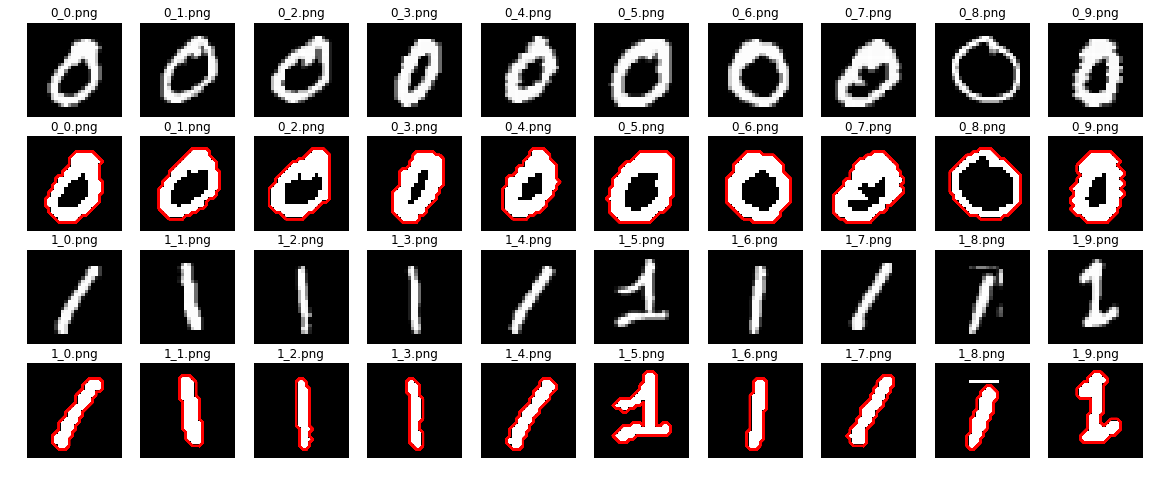

In [4]:
# Plot images to compare the preprocessing effects and show contour on the preprocessed images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
# Zeros images before applying preprocessing
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
# Zeros images after aplying preprocessing
for ax, im, nm in zip(axes[1], zeros_im, zeros_names):
    im = pre_processing(im)[0]
    ax.imshow(im, cmap='gray')
    [ax.plot(pre_processing(im)[1][:, 1], pre_processing(im)[1][:, 0], color ='red', linewidth=2) for i in im]
    ax.axis('off')
    ax.set_title(nm)
# Ones images before applying preprocessing   
for ax, im, nm in zip(axes[2], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
# Ones images after aplying preprocessing
for ax, im, nm in zip(axes[3], ones_im, ones_names):
    im = pre_processing(im)[0]
    ax.imshow(im, cmap='gray')
    [ax.plot(pre_processing(im)[1][:, 1], pre_processing(im)[1][:, 0], color ='red', linewidth=2) for i in im]
    ax.axis('off')
    ax.set_title(nm)

In [5]:
def fourierDescriptors(image, index):
    '''
    The first descriptors contain the majority of the shape information of the object
    index: the index of fourier components
    '''
    contour = measure.find_contours(image, 0)[0]
    u_k = contour[:,1] + 1j*contour[:,0]   
    u_kFFT = np.fft.fft(u_k)
    # Since the first descriptors contain the majority of the shape information of the object we choose 
    # the first descriptors as the reference
    descr = abs(u_kFFT[1])
    # Return a list of normalized features
    return [abs(u_kFFT[i])/descr for i in index]

In [6]:
# Defining Fourier Transform function
def fourierTransform(image, index, method):
    image_transformed = method(image)
    image_fourier = []
    for i in image_transformed:
        i = pre_processing(i)[0]
        a = fourierDescriptors(i, index)
        image_fourier.append(a)
    image_fourier = np.array(image_fourier)
    return image_fourier

__Performing rotation on the image:__

In [7]:
def rotation(image):
    '''
    Applying rotation to get more images.
    A rotation affect the phase of all the descriptors by the same amount, and does not modify their amplitude
    '''
    rotate90d = [transform.rotate(i, 90, resize=False, preserve_range=True).astype('uint8') for i in image]
    rotate180d = [transform.rotate(i, 180, resize=False, preserve_range=True).astype('uint8') for i in image]
    rotate270d = [transform.rotate(i, 270, resize=False, preserve_range=True).astype('uint8') for i in image]
    return  list(image) + rotate90d + rotate180d + rotate270d

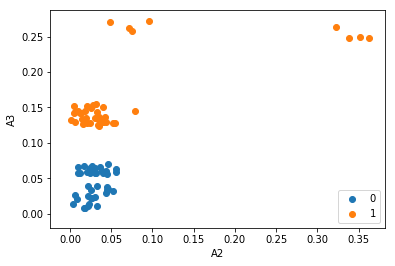

In [26]:
zerosFourier = fourierTransform(zeros_im, [2,3], rotation)
onesFourier = fourierTransform(ones_im, [2,3], rotation)

# Plotting the results
plt.scatter(zerosFourier[:,0], zerosFourier[:,1], label='0')
plt.scatter(onesFourier[:,0], onesFourier[:,1], label='1')
plt.xlabel('A2')
plt.ylabel('A3')
plt.legend(loc='lower right');

After trying several different pairs of descriptors, A2 and A3 give us the two distinct clusters. We see that there are two clusters, 0s and 1s from the graph above which is external representation of the decsriptors. Moreover, these two clusters have small intra-class variance and large inter-class variance by using only two features of fourier descriptors. We also see the independence in translation-rotation while we are trying rotation in different degrees.

However, from the above graph, we can also see that there are also outliers which have larger values in A3 descriptor for the cluster 1. It is clear from the raw images that they might be the 1s which are written differently than the other 1s. As we can see from the 1_5.png and 1_9.png, they have much more contours and corners than others do.

__Performing scaling on the image:__

In [9]:
def scaling(img):
    scaled_im = cv2.resize(img, None, fx=2, fy=2, interpolation = cv2.INTER_AREA  )
    return scaled_im

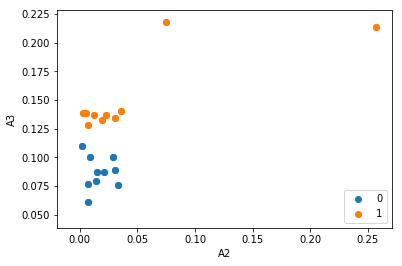

In [27]:
zerosFourierS = fourierTransform(zeros_im, [2,3], scaling)
onesFourierS = fourierTransform(ones_im, [2,3], scaling)

# Plotting the results
plt.scatter(zerosFourierS[:,0], zerosFourierS[:,1], label='0')
plt.scatter(onesFourierS[:,0], onesFourierS[:,1], label='1')
plt.xlabel('A2')
plt.ylabel('A3')
plt.legend(loc='lower right');

Scaling is just resizing of the image. OpenCV comes with a function cv2.resize() for this purpose. Different interpolation methods are used. Preferable interpolation methods are cv2.INTER_AREA for shrinking and cv2.INTER_CUBIC (slow) & cv2.INTER_LINEAR for zooming. After trying different interpolation methods and descriptors, we were able to do clustering of 0s and 1s by interpolating on cv2.INTER_AREA and by using A2 and A3 fourier descriptors. We see that there are two clusters, 0s and 1s from the graph above which is external representation of the decsriptors. Moreover, these two clusters have small intra-class variance and large inter-class variance by using only two features of fourier descriptors. 

However, in addition to rotation graph we did before, with the above graph, we can also see that there are outliers which have larger values in A3 descriptor for the cluster 1. It is clear from the raw images that they might be the 1s which are written differently than the other 1s. As we can see from the 1_5.png and 1_9.png, they have much more contours and corners than others do.

### 1.3 Additional methods

>### 1.3.1 Region-based descriptors: simple ones

In this Region-based descriptors method, we will use compacity as a second feature while number of corners, rectangularity and elongation as a first features in the feature extraction processes. 

Functions below, _featureImages(), plottingFeature()_, and _plotF()_ will be used for the feature extraction processes and plotting the results in this method.

In [11]:
# Preparation for plotting features
def featureImages(im, f1, f2):
    imageRotated = rotation(im)
    features = []
    for i in imageRotated:
        a1 = f1(i)
        a2 = f2(i)
        features.append([a1, a2])
    features = np.array(features)
    return features, [f1.__name__, f2.__name__]

def plottingFeature(imFeatures, features, labels):
    plt.figure(figsize=(8,8))
    for f, l in zip(imFeatures, labels):
        plt.scatter(f[:,0], f[:,1], label=l)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    
def plotF(method1, method2):
    listImages = [zeros_im, ones_im]
    listImagesResult = []
    for im in listImages:
        imF, fName = featureImages(im, method1, method2)
        listImagesResult.append(imF)
    plottingFeature(listImagesResult, fName, range(len(listImages)))

We also defined compacity here, since we will use it as a compared feateure for the following three methods below. 

In [12]:
# Defining compacity
def compacity(image):
    _,thresh1 = cv2.threshold(image,40,255,cv2.THRESH_BINARY)
    _, contours, _ = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    A = cv2.contourArea(contours[0])
    P = cv2.arcLength(contours[0],True)
    C = (P**2)/A
    return C

>> __1.3.1.1 Compacity and Number of Corner__

>>We know that each digits from 0 to 9 have different shapes and thus different number of corner pixels for each of one. In order to be able to cluster the 0s and 1s, we can count the number of corners and use it as a feture. In this method, we also use another feature compacity (which is invariant in translation, rotation and scaling) of the image as the second feature.

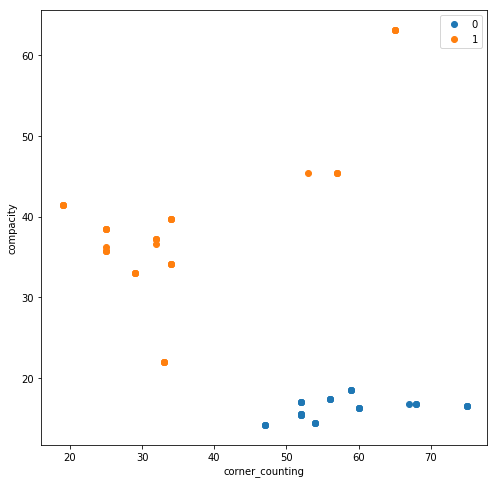

In [13]:
def corner_counting(image):
    image = ndimage.grey_opening(image,size = (2,2))
    _,thresh1 = cv2.threshold(image,40,255,cv2.THRESH_BINARY)
    # harris_dst (--> output of Harris edge detector) – Image to store the Harris detector responses.
    harris_dst = cv2.cornerHarris(thresh1,2,3,0.04)
    # Threshold for an optimal value, threshold value may vary depending on the image.
    numbers = thresh1[harris_dst>0.01*harris_dst.max()].shape 
    return numbers[0]

plotF(corner_counting, compacity)

>>We saw that by increasing the threshold for an optimal value, the number of corners counted decreases. And in some point, it gets more difficult to do clustering of 0s and 1s digits' images. Also above image gives us two distinct clusters.

>> __1.3.1.2 Compacity and Rectangularity__

Rectangularity : ratio between the surface of the object and that of the circumscript rectangle. 

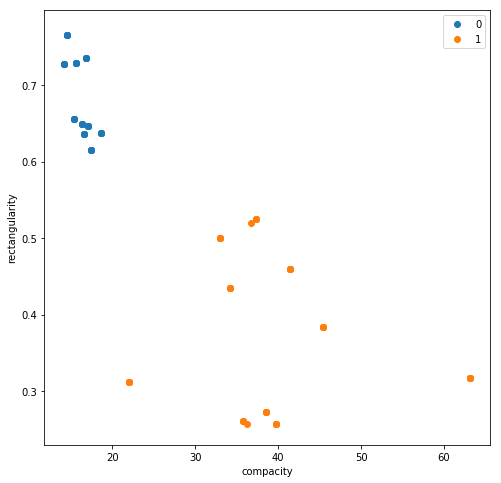

In [14]:
def rectangularity(image):
    _,thresh1 = cv2.threshold(image,40,255,cv2.THRESH_BINARY)
    _, contour, _ = cv2.findContours(image,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    area = cv2.contourArea(contour[0])
    xcoor, ycoor, width, height = cv2.boundingRect(contour[0])
    rect_area = width*height
    rectangularitY = float(area)/rect_area
    return rectangularitY

plotF(compacity, rectangularity)

We see that there are two clusters 0s and 1s in the above graph. While the intra-variane of 0s is small, the intra-variance of 1s is a relatively high. Additionally, we see that the rectangularity of 0s is much higher than 1s, although the compacity of 1s is higher than 0s.

>> __1.3.1.3 Compacity and Elongation__

Elongation: the ratio between the maximum diameter of the object and its minimum diameter perpendicular to it.

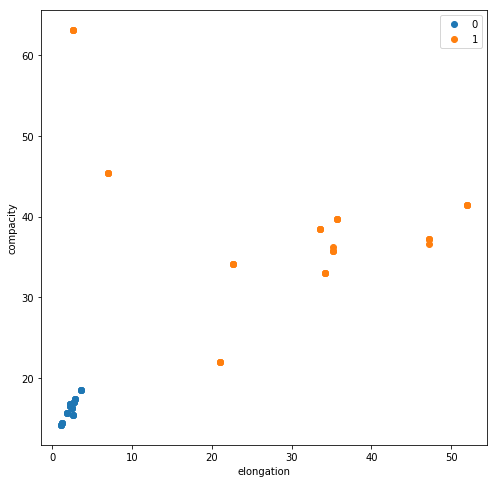

In [15]:
def elongation(image):
    image = ndimage.grey_opening(image,size = (2,2))
    _,thresh1 = cv2.threshold(image,40,255,cv2.THRESH_BINARY)
    moment = cv2.moments(thresh1)
    xcoor = moment['mu20'] + moment['mu02']
    ycoor = 4 * moment['mu11']**2 + (moment['mu20'] - moment['mu02'])**2
    return (xcoor + ycoor**0.5) / (xcoor - ycoor**0.5)

plotF(elongation, compacity)

There are two clusters but the intra-variance of 1 is still high. The elongation and compacity of 1s is higher than that of 0s.

>### 1.3.2 Skeleton

In this part, first we skeletonize the image of ones and zeros using the Scikit Image library and visualize the skeletons.

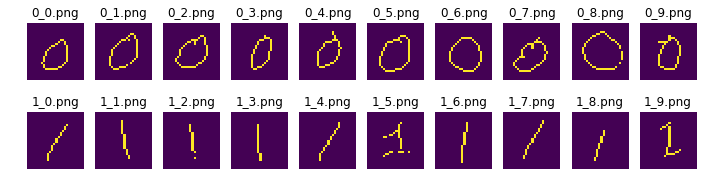

In [16]:
from skimage.morphology import skeletonize
import cv2
import numpy as np

skeleton_zero=[]
Binary=[]
for im, nm in zip(zeros_im, zeros_names):
    # Transforming image to binary image
    ret,thresh = cv2.threshold(im,248,255,cv2.THRESH_BINARY)
    np_img = np.array(thresh)
    np_img[np_img > 0] = 1
    # Skeletonizing the image
    skeleton_zero.append(skeletonize(np_img))  

skeleton_one=[]
Binary=[]
for im, nm in zip(ones_im, ones_names):
    # Transforming image to binary image
    ret,thresh = cv2.threshold(im,248,255,cv2.THRESH_BINARY)
    np_img = np.array(thresh)
    np_img[np_img > 0] = 1
    # Skeletonizing the image
    skeleton_one.append(skeletonize(np_img))

# Plotting the skeletons
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3)) 
for ax, im, nm in zip(axes[0], skeleton_zero, zeros_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], skeleton_one, ones_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)

Now we have to extract two features from the skeletonized images to perform the description. The first feature is the number of corner pixels in each image. The corners are the yellow pixels that just have one yellow neighbor pixel. In order to count the corner pixels, we find the points which belong to skeleton and check all their neighbors. If there is just one neighbor pixel which also belongs to skeleton, we have to count that point as a corner.

The second feature that we used is the total number of skeleton pixels and we expect to have a higher number for the zeros.

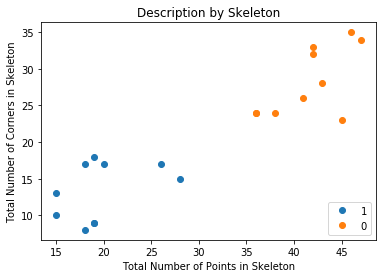

In [17]:
# Removing the first and last rows and columns from images
_,h,w= np.shape(skeleton_zero)
h=h-1
w=w-1
skeleton_zero_check=skeleton_zero[:][1:h][1:w]

# Initilizing the variables
Total_number_of_points0=[]
Total_number_of_corners0=[]

# Main for loop for feature extraction of zeros
for im in np.arange(0,np.shape(skeleton_zero)[0],1):
    Number_of_points=0
    Number_of_corners=0
    vertical_line=[]
    for x in np.arange(1,h,1):
        for y in np.arange(1,w,1):
            if skeleton_zero[im][x][y]==True:
                 # Extracting the number of points
                Number_of_points=Number_of_points+1
                s=0
                for a in np.arange(-1,1,1):
                    for b in np.arange(-1,1,1):
                        if skeleton_zero[im][x+a][y+b]== True:
                            s=s+1
                if s==2:
                    # Extracting the number of corners
                    Number_of_corners=Number_of_corners+1

    Total_number_of_points0.append(Number_of_points)
    Total_number_of_corners0.append(Number_of_corners)
    
# Removing the first and last rows and columns from images    
_,h,w= np.shape(skeleton_one)
h=h-1
w=w-1
skeleton_one_check=skeleton_one[:][1:h][1:w]

# Initilizing the variables
Total_number_of_points1=[]
Total_number_of_corners1=[]

# Main for loop for feature extraction of ones
for im in np.arange(0,np.shape(skeleton_one)[0],1):
    Number_of_points=0
    Number_of_corners=0
    for x in np.arange(1,h,1):
        for y in np.arange(1,w,1):
            if skeleton_one[im][x][y]==True:
                # Extracting the number of points
                Number_of_points=Number_of_points+1
                s=0
                for a in np.arange(-1,1,1):
                    for b in np.arange(-1,1,1):
                        if skeleton_one[im][x+a][y+b]== True:
                            s=s+1
                if s==2:
                    # Extracting the number of corners
                    Number_of_corners=Number_of_corners+1
    Total_number_of_points1.append(Number_of_points)
    Total_number_of_corners1.append(Number_of_corners) 

# Plotting the features plot
Plot_ones = plt.plot(Total_number_of_points1,Total_number_of_corners1, "o", label="1")
Plot_zeros = plt.plot(Total_number_of_points0,Total_number_of_corners0, "o", label="0")
plt.legend(loc=4)
plt.xlabel('Total Number of Points in Skeleton')
plt.ylabel('Total Number of Corners in Skeleton')
plt.title('Description by Skeleton')
plt.show()

As it is clear in the above plot, in general, our skeleton method performs a good description and clustring for the points. In fact, we believe that the number of corners, is a more powerful feature to perform clustering for ones and zeros because of the shape of these digits in comparison to the total number of points, which relies more on the handwriting. 

>### 1.3.3 Moments

In this part, we will use the second moment around the two different axes to perform the description. Second moment, or moment of inertia, shows the inertia of the shape, when you rotate it around x axis or y axis. Because of the normal shape of zero and one digits, we expect to have a good description based on it.

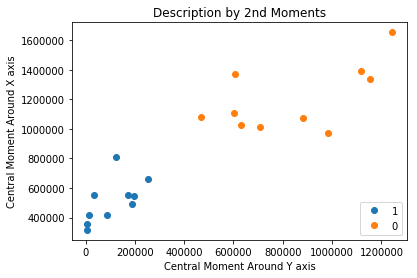

In [18]:
# Initilizing the lists
mu_20=[]
mu_02=[]

# Main for loop for zeros
for im, nm in zip(zeros_im, zeros_names):
    # Extracting the second moment around x axis and y axis
    M = cv2.moments(im);
    mu_20.append(M["mu20"])
    mu_02.append(M["mu02"])
second_order_central_moment_zeros= (mu_20,mu_02)

# Initilizing the lists
mu_20=[]
mu_02=[]

# Main for loop for zeros
for im, nm in zip(ones_im, ones_names):
    # Extracting the second moment around x axis and y axis
    M = cv2.moments(im);
    mu_20.append(M["mu20"])
    mu_02.append(M["mu02"])
second_order_central_moment_ones= (mu_20,mu_02)

# Plotting
Plot_ones = plt.plot(second_order_central_moment_ones[0],second_order_central_moment_ones[1], "o",label="1")
Plot_zeros = plt.plot(second_order_central_moment_zeros[0],second_order_central_moment_zeros[1],"o", label="0")
plt.legend(loc=4)
plt.xlabel('Central Moment Around Y axis')
plt.ylabel('Central Moment Around X axis')
plt.title('Description by 2nd Moments')
plt.show()

As it has been shown in the above images, the second momentum performs a good description and clustering for us. In fact, the zeros have a higher second moment around y axis as their 'width' is higher and they have a higher moment around x axis because of having more than one pixel in each row. The inter-class variance of zeros is higher which makes sense due to the definition of second moment. In fact in zeros, we have more points which are far from the main axes of image and a little change in them, may cause a big difference in the second moment.

>### 1.3.4 Histogram of Oriented Gradients

In this part, we perform the histogram of oriented gradients method to find the features for description. In this method we find the histograms, for a cell that will be moved inside the image. The descriptor is the concatenation of these histograms. Here, we used a block size of 8x8, cell size of 2x2, and a stride of 4x4. It is better not to have a high block size and cell size in order to extract real feature of each part of image. Also, it is better not to have a really small block and cell, as it will be sensitive to little differences between the images and the error increases. We set the number of bins for the histogram to 8. It means that we have an increment of 32 to capture gradients between 0 and 255.

After extraction of the features, we used Principal Component Analysis (PCA) method to combine the features into two and we performed the plotting for these two PCA features.

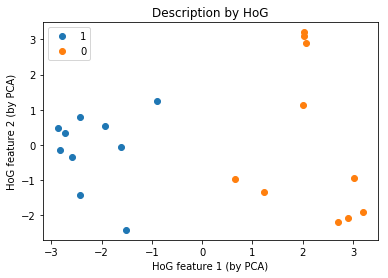

In [25]:
from sklearn.decomposition import PCA

# Applying HoG descriptor with block size of 8x8, cell size of 2x2, stride of 4x4,and 8 bins
HoG_descriptor = cv2.HOGDescriptor((28,28),(8,8),(4,4),(2,2),8)
Feature_list =[]

# Performing the HoG description for zeros
for im, nm in zip(zeros_im, zeros_names):
    HoG_descripted = HoG_descriptor.compute(im)
    # Flattening the result
    flattened= [item for sublist in HoG_descripted for item in sublist]
    Feature_list.append(flattened)

# Performing the HoG description for ones
for im, nm in zip(ones_im, ones_names):
    HoG_descripted = HoG_descriptor.compute(im)
    # Flattening the result
    flattened = [item for sublist in HoG_descripted for item in sublist]
    Feature_list.append(flattened)

# Combining the features using PCA
PCA_features = PCA(n_components=2)
features= PCA_features.fit_transform(Feature_list)

# Plotting the feature plot
Plot_ones = plt.plot(features.transpose()[0][0:10],features.transpose()[1][0:10], "o", label="1")
Plot_zeros = plt.plot(features.transpose()[0][10:20],features.transpose()[1][10:20],"o", label="0")
plt.legend(loc=2)
plt.xlabel('HoG feature 1 (by PCA)')
plt.ylabel('HoG feature 2 (by PCA)')
plt.title('Description by HoG')
plt.show()

As you can see, the variance between the clusters is not bad, but the variance inside each of the clusters is a bit high specially for the zeros. In fact, the zeros can be written in more different scales and the result of this is a difference between the localized histograms.